<a href="https://colab.research.google.com/github/Nikoadhi/finalprojectbangkit/blob/master/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile
import random
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Kaggle_Car_Bus.zip to Kaggle_Car_Bus.zip


In [0]:
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['Kaggle_Car_Bus.zip']), "r")
zf.extractall()

In [32]:
print(len(os.listdir('/content/Training_set/Training_set/electric bus')))
print(len(os.listdir('/content/Training_set/Training_set/electric car')))
print(len(os.listdir('/content/test/test/electric bus')))
print(len(os.listdir('/content/test/test/electric car')))

743
743
191
191


In [33]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4624)             

In [37]:
TRAINING_DIR = "/content/Training_set/Training_set"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    target_size=(150, 150))


VALIDATION_DIR = "/content/test/test"
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=32,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 1486 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


In [0]:
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.90):
          print("\nReached 90.0% accuracy so cancelling training!")
          self.model.stop_training = True

In [39]:
callbacks = callbacks()
history = model.fit_generator(train_generator,                      
                              epochs=50,
                              verbose=1,
                              steps_per_epoch = 40,
                              validation_data=validation_generator,
                              callbacks=[callbacks])

Epoch 1/50
40/40 [==============================] - 28s 709ms/step - loss: 0.4781 - acc: 0.7678 - val_loss: 0.3830 - val_acc: 0.8508
Epoch 2/50
40/40 [==============================] - 29s 716ms/step - loss: 0.4811 - acc: 0.7750 - val_loss: 0.4205 - val_acc: 0.7984
Epoch 3/50
40/40 [==============================] - 28s 712ms/step - loss: 0.4599 - acc: 0.7892 - val_loss: 0.3922 - val_acc: 0.8272
Epoch 4/50
40/40 [==============================] - 28s 708ms/step - loss: 0.4452 - acc: 0.7908 - val_loss: 0.5164 - val_acc: 0.7120
Epoch 5/50
40/40 [==============================] - 29s 720ms/step - loss: 0.4313 - acc: 0.8114 - val_loss: 0.4508 - val_acc: 0.7775
Epoch 6/50
40/40 [==============================] - 28s 708ms/step - loss: 0.4182 - acc: 0.8241 - val_loss: 0.3853 - val_acc: 0.8089
Epoch 7/50
40/40 [==============================] - 28s 710ms/step - loss: 0.4291 - acc: 0.7979 - val_loss: 0.3668 - val_acc: 0.8534
Epoch 8/50
40/40 [==============================] - 28s 711ms/step - 

In [45]:
test_image = image.load_img('/content/test/test/electric car/electric__image-101.jpeg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction = 'Bus'
else:
  prediction = 'Car'

print(prediction)

Car


Text(0.5, 1.0, 'Training and validation loss')

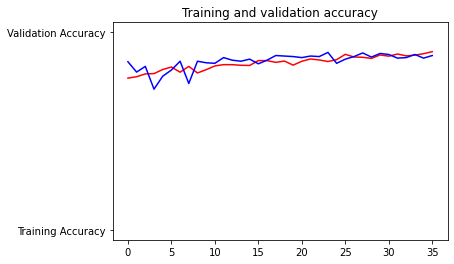

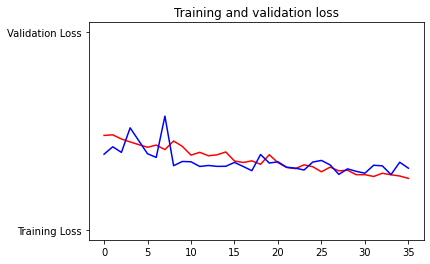

In [42]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [43]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 168
drwxr-xr-x 2 root root   4096 Jun 16 07:11 assets
-rw-r--r-- 1 root root 160609 Jun 16 07:11 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun 16 07:11 variables
